<h1>Classifying Intronic Polyadenylation Events from Random Polyadenylation signals in Introns Based on Cis-regulatory Elements<h1>
<h6>Description: The following program trains a neural network based on 8383 ranges containing two classes retrieved from random polyadenylation signals from introns and confident intronic polyadenylation sites. The input to the neural network is a DNA sequence containing a CSE hexamer "AATAAA" or "ATTAAA" at its 50th nucleotide and 186 nt in length.<h6>
@author Annice Najafi
<br>Texas A&M University
<br>Spring 2021    
    <br><br>

Polyadenylation is initiated by the recognition of the polyA signal on the mRNA by RNA polymerase then the transcript is cut about 10-30 nts

<h4>Taken From Aparent</h4>
<p>"APARENT is based on a Convolutional Neural Network (CNN). The input DNA sequence is aligned such that the CSE hexamer of the
proximal PAS starts at position 50. The sequence is transformed as a 1-Hot-Coded matrix, i.e., where nucleotide A is encoded as the
vector [1, 0, 0, 0], C is encoded as [0, 1, 0, 0], G is encoded as [0, 0, 1, 0] and T is encoded as [0, 0, 0, 1]. The coding can best be
thought of as a 1-dimensional signal (over sequence position) spanning 4 signal channels (nucleotides). The input sequence is
186 nt long, a number that was chosen such that all randomized regions of all 30 UTR libraries would fit the input window."</p>

<h2><p style="color:#FF1493">Retrieving HG38 Genome Sequence For Ranges</h2>

In [1]:
import rpy2.rinterface as rinterface
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
#import BSgenome
bs_genome = importr('BSgenome.Hsapiens.UCSC.hg38')
# You need to import 'Biostrings' explicitly
# Loading 'BSgenome.Hsapiens.UCSC.hg19' won't load 'Biostrings' automatically
bio_strings = importr('Biostrings')


one_seq = bio_strings.getSeq(bs_genome.Hsapiens, "chr1", 182747, 183131, rinterface.NA_Integer, "+", True) 

print(one_seq[0]) 

GTAAGTAGTGCTTGTGCTCATCTCCTTGGCTGTGATACATGGCCAGCCCTCGCTCCAGCAGCTGGACCCCTACCTGCCGTCTGCTGCCATCGGAGCCCAAAGCCGGGCTGTGACTGCTCAGACCAGCCGGCTGGAGGGAGGGGCTCAGCAGGTCTACCTTTGGCCCTGGGAGAGCAGGTGGAAGATCAGGCAGGCCATCGCTGCCACAGAACCCAGTGGATTGGCCTAGGTGGGATCTCTGAGCTCAACAAGCCCTCTCTGGGTGGTAGGTGCAGAGACGGGAGGGGCAGAGCCGCAGGCACAGCCAAGAGGGCTGAAGAAATGGTAGAACGGAGCAGCTGGTGATGTGTGGGCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAG


<h3>One hot-encoding Function</h3>
<br>
Name: hot_encode
<br>
input: sequence
<br>
output: the sequence converted to arrays of four channels

In [2]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re

def hot_encode(one_seq):
    seq = list(one_seq)
    seq_arr = array(list(seq))
    label_encoder = LabelEncoder()
    integer_encoded_seq = label_encoder.fit_transform(seq_arr)
    #one hot the sequence
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded_seq = integer_encoded_seq.reshape(len(integer_encoded_seq), 1)
    onehot_encoded_seq = onehot_encoder.fit_transform(integer_encoded_seq)
    onehot_encoded_seq=onehot_encoded_seq
    return(onehot_encoded_seq)

In [3]:
#Example:
hot_encode(one_seq[0])
print(one_seq[0])
print(hot_encode(one_seq[0]))
len(hot_encode(one_seq[0]))

GTAAGTAGTGCTTGTGCTCATCTCCTTGGCTGTGATACATGGCCAGCCCTCGCTCCAGCAGCTGGACCCCTACCTGCCGTCTGCTGCCATCGGAGCCCAAAGCCGGGCTGTGACTGCTCAGACCAGCCGGCTGGAGGGAGGGGCTCAGCAGGTCTACCTTTGGCCCTGGGAGAGCAGGTGGAAGATCAGGCAGGCCATCGCTGCCACAGAACCCAGTGGATTGGCCTAGGTGGGATCTCTGAGCTCAACAAGCCCTCTCTGGGTGGTAGGTGCAGAGACGGGAGGGGCAGAGCCGCAGGCACAGCCAAGAGGGCTGAAGAAATGGTAGAACGGAGCAGCTGGTGATGTGTGGGCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAG
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


385

# Retrieve Regions with Intronic Polyadenylation Events

In [4]:
#Read in the bed file with ranges
L=list()
with open("/Users/annicenajafi/Downloads/hg38_lifted_over_GSE111793.bed")as f:
    for line in f:
        #print(line.strip().split())
        B=line.strip().split();
        L.append(B)

In [5]:
import pandas as pd
seq_store=list()
count=0;
count1=0;
count2=0;
for entry in L:
    elem = entry[0]
    chr_hold=elem.split(":")[0]
    range_hold=elem.split(":")[1]
    start_hold=float(range_hold.split("-")[0])
    #print(type(float(start_hold)))
    end_hold=float(range_hold.split("-")[1])
    one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
    seqseq = one_seq[0]
    polyA_loc = seqseq.find("AATAAA")
    
    if(polyA_loc!=-1):
            
            seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
            #print(seqseq_updated)
            seq_store.append(hot_encode(seqseq_updated))
            count2=count2+1;
    
    one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
    #one_seq = one_seq[::-1]
    seqseq = one_seq[0]
    polyA_loc = seqseq.find("ATTAAA")        
    if(polyA_loc!=-1):
    #        print(polyA_loc)
    #        print(start_hold)
    #        print(end_hold)
            count1=count1+1;
            seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc - 50), (start_hold + polyA_loc + 135), rinterface.NA_Integer,"+", True)[0]
            #seqseq_updated = seqseq_updated[::-1]
            #print(seqseq_updated)
            seq_store.append(hot_encode(seqseq_updated))
    

<h2><p style="color:#FF1493">Adding Extra Data from Annotation Source</p>

In [6]:
import pandas as pd

# Read the CSV into a pandas data frame (df)
#   With a df you can do many things
#   most important: visualize data with Seaborn
df = pd.read_csv('/Users/annicenajafi/Downloads/introns_mar_annotated_hg38.csv', delimiter=',')

# Or export it in many ways, e.g. a list of tuples
ref_tuples = [tuple(x) for x in df.values]

res = [item for item in ref_tuples
   if item[8] == "intron.3utr"]

In [7]:

res = [item for item in ref_tuples
   if item[8] == "intron.3utr"]

In [8]:
res[1][5]

'-'

<h2><p style="color:#FF1493">Merge Data from Two Datasets</p>

In [9]:
for entry in res:
    if(entry[5]=="+"):
        chr_hold=entry[1]
        start_hold=entry[2]
        #print(type(float(start_hold)))
        end_hold=entry[3]
        one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
        seqseq = one_seq[0]
        polyA_loc = seqseq.find("AATAAA")
        
    
        if(polyA_loc!=-1):
        #if(polyA_loc>(len(seqseq)-200)):
                seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
                #print(seqseq_updated)
                seq_store.append(hot_encode(seqseq_updated))
    
        #one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
        #one_seq = one_seq[::-1]
        #seqseq = one_seq[0]
        polyA_loc = seqseq.find("ATTAAA")    
    
        if(polyA_loc!=-1):
        #if(polyA_loc>(len(seqseq)-200)):
            
                seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
          #      seqseq_updated = seqseq_updated[::-1]
                #print(seqseq_updated)
                seq_store.append(hot_encode(seqseq_updated))
 

In [10]:
count2

1610

In [11]:
len(seq_store)

4089

<h2><p style="color:#FF1493">Retrieve Random PolyA Signals from Reference Genome</p>

In [12]:

path = "/Users/annicenajafi/Desktop/hg38_annotated_introns_mar.bed"
randomPolyA_ls=list()
with open(path)as f:
    for line in f:
        #print(line.strip().split())
        B=line.strip().split();
        randomPolyA_ls.append(B)

In [13]:
from sklearn.utils import shuffle
#get rid of the header
randomPolyA_ls = randomPolyA_ls[2:len(randomPolyA_ls)]
#shuffle the rows
randomPolyA_ls = shuffle(randomPolyA_ls)

In [14]:
randomPolyA_ls[100]

['"150446"',
 '"chr17"',
 '56477655',
 '56480667',
 '3013',
 '"+"',
 '"162282"',
 '"ANKFN1"',
 '"intron"',
 '"0"',
 '0',
 '17',
 '"cds_exon"',
 '"cds_exon"',
 '"protein_coding"',
 '56480818']

In [15]:
count=0;
random_poly=list()

for entry in randomPolyA_ls:

    if(count<0.5*len(seq_store)):
        if(entry[8]=='"intron"'):
        
            chr_hold=entry[1]
            chr_hold=chr_hold.replace('"', '')
            start_hold=int(entry[2])
            #print(type(float(start_hold)))
            end_hold=int(entry[3])
            one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
            seqseq = one_seq[0]
            polyA_loc = seqseq.find("AATAAA")
            if(polyA_loc!=-1):
                if(polyA_loc>(len(seqseq)-200)):
            
                    seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
                    #print(seqseq_updated)
            random_poly.append(hot_encode(seqseq_updated))
            count=count+1;
    if(0.5*len(seq_store)<count and count<len(seq_store)):
        if(entry[8]=='"intron"'):
        
            chr_hold=entry[1]
            chr_hold=chr_hold.replace('"', '')
            start_hold=int(entry[2])
            #print(type(float(start_hold)))
            end_hold=int(entry[3])
            one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
            seqseq = one_seq[0]
            polyA_loc = seqseq.find("ATTAAA")
            if(polyA_loc!=-1):
                if(polyA_loc>(len(seqseq)-200)):
            
                    seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
                    #print(seqseq_updated)
            random_poly.append(hot_encode(seqseq_updated))
            count=count+1;
    

In [16]:
len(seq_store)

4089

In [17]:
import math
perc=1
training_threshold=math.floor(perc*len(seq_store))
training_threshold
#print("The training set is "+ str(perc*100) + " percent of the entire dataset.")
train=random_poly[1:training_threshold]
train2=seq_store[1:training_threshold]
x_train = train + train2
print("The size of the training set is equivalent to ", str(len(x_train)))

The size of the training set is equivalent to  8176


In [18]:
y_train=list()
for i in range(1,(training_threshold)):
    y_train.append(1)
for i in range(1,(training_threshold)):
    y_train.append(0)   
if(len(y_train)==len(x_train)):
    print("The size of the label array is equivalent to the size of the training set")

The size of the label array is equivalent to the size of the training set


In [19]:
#test= random_poly[training_threshold:(len(random_poly)+1)]
#test2=seq_store[training_threshold:(len(seq_store)+1)]
#x_val=test+test2
#print("The size of the test set is equivalent to ", str(len(x_val)))

In [20]:
#y_val=list()
#for i in range(training_threshold,(len(random_poly))):
#    y_val.append(1)
#for i in range(training_threshold,(len(seq_store))):
#    y_val.append(0)   
#if(len(y_val)==len(x_val)):
#    print("The size of the label array is equivalent to the size of the testing set")

In [21]:
import numpy as np
y_train = np.asarray(y_train).astype('float')
#y_val = np.asarray(y_val).astype('float')

x_train=np.asarray(x_train)
#x_val=np.asarray(x_val)

In [22]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

In [23]:
y_train.shape

(8176, 1)

# Shuffle training and validation set

In [24]:
from sklearn.utils import shuffle
import numpy as np
x_train, y_train = shuffle(x_train, y_train)
#x_val, y_val = shuffle(x_val, y_val)

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

<h2><p style="color:#FF1493">Baseline Model</h2>

In [26]:
x_train.shape

(6132, 186, 4)

<h4>Taken From Aparent</h4>
<h6>Architecture</h6>
<p>
"The CNN was constructed from two convolutional layers using ReLU activation functions, interlaced with a MaxPool layer. The first
convolutional layer had 70 1-dimensional filters covering all 4 nucleotide input channels. The filters of the first layer were 8 positions
(nucleotides) wide. The second convolutional layer had 110 1-dimensional filters covering all 70 output channels from the previous
layer, where the filter width was set to 6. The MaxPool layer subsampled the 1D signal by a factor of 2. The flattened convolution
output is passed to a fully connected layer of 80 hidden ReLU units with 0.2x dropout, which finally connects to a logistic regression
node that outputs the predicted proximal isoform proportion."</p>

In [139]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dropout
# define model
model = models.Sequential()
model.add(layers.Conv1D(filters=70, kernel_size=8, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=110, kernel_size=6, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(80, activation='relu'))
#model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(2, activation="softmax"))
#model.compile(optimizer='adam', loss='mse')
#binary_crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['acc'])

<h2><p style="color:#FF1493">Training The Baseline Model</h2>

In [64]:
import tensorflow
import os
os.environ['TENSORBOARD_BINARY'] = '/Users/annicenajafi/Library/Python/3.7/bin'
%load_ext tensorboard
import tensorflow as tf
import datetime
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to start '/Users/annicenajafi/Library/Python/3.7/bin'
(set by the `TENSORBOARD_BINARY` environment variable): [Errno 13]
Permission denied: '/Users/annicenajafi/Library/Python/3.7/bin'

In [125]:
#from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "IPA_CIS_regulatory_elements-{}".format(int(time.time()))
log_dir = "/Users/annicenajafi/Downloads/annice/logs"
#+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [119]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [140]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])
                    #validation_data=(x_tes, y_tes))


Train on 4905 samples, validate on 1227 samples
Epoch 1/15
4905/4905 [==============================] - 5s 1ms/sample - loss: 0.9442 - acc: 0.3441 - val_loss: 0.6885 - val_acc: 0.0000e+00
Epoch 2/15
4905/4905 [==============================] - 4s 760us/sample - loss: 0.7068 - acc: 0.2491 - val_loss: 0.7125 - val_acc: 0.0000e+00
Epoch 3/15
4905/4905 [==============================] - 4s 816us/sample - loss: 0.7597 - acc: 0.3115 - val_loss: 0.6963 - val_acc: 0.4230
Epoch 4/15
4905/4905 [==============================] - 4s 807us/sample - loss: 0.8559 - acc: 0.3918 - val_loss: 0.7090 - val_acc: 0.0000e+00
Epoch 5/15
4905/4905 [==============================] - 4s 871us/sample - loss: 1.1271 - acc: 0.3967 - val_loss: 0.9045 - val_acc: 0.0073
Epoch 6/15
4905/4905 [==============================] - 5s 933us/sample - loss: 1.5497 - acc: 0.4512 - val_loss: 0.9488 - val_acc: 0.0090
Epoch 7/15
4905/4905 [==============================] - 5s 932us/sample - loss: 2.3917 - acc: 0.4446 - val_loss: 0

In [141]:
print("Evaluate on test data")
results_eval_train = model.evaluate(x_train, y_train, batch_size=512)

results_eval_test = model.evaluate(x_test, y_test, batch_size=512)
print(results_eval_train, " of the training data equivalent to ",len(x_train)," were correctly classified.")
print(results_eval_test, " of the testing data equivalent to ",len(x_test)," were correctly classified.")

Evaluate on test data
2044/2044 [==============================] - 0s 220us/sample - loss: 12.8462 - acc: 1.0000
[13.109287039252255, 1.0]  of the training data equivalent to  6132  were correctly classified.
[12.846189120044446, 1.0]  of the testing data equivalent to  2044  were correctly classified.


In [127]:
%tensorboard --logdir "/Users/annicenajafi/Downloads/annice/logs"

Reusing TensorBoard on port 6006 (pid 48737), started 0:06:16 ago. (Use '!kill 48737' to kill it.)

In [95]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir /Users/annicenajafi/Downloads/logs (started 0:04:52 ago; pid 48644)


In [128]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           multiple                  2310      
_________________________________________________________________
conv1d_14 (Conv1D)           multiple                  46310     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  765680    
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                 

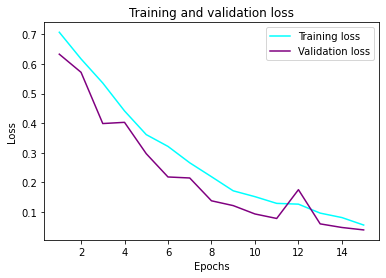

In [129]:
# plot the loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'cyan', label="Training loss") # blue dot
plt.plot(epochs, val_loss_values, 'purple', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

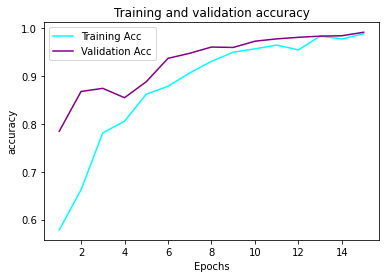

In [130]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'cyan', label='Training Acc')
plt.plot(epochs, val_acc_values, 'purple', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [51]:
y_pred = model.predict_classes(x_test)


/Users/annicenajafi/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


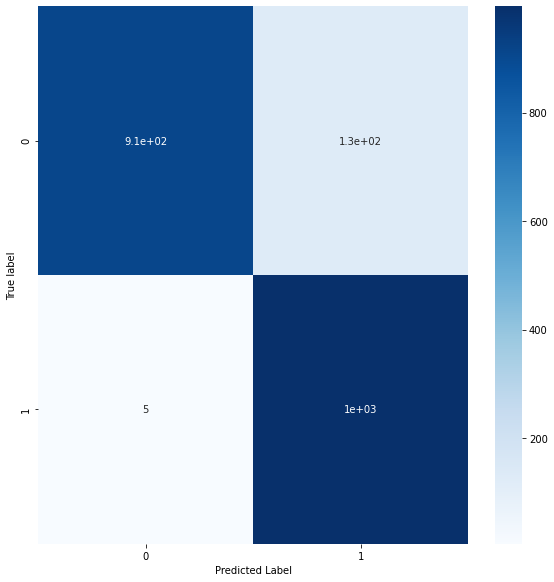

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
figure = plt.figure(figsize=(8,8))
sns.heatmap(conf, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted Label')
plt.show()

# Test Model

TTCGGTAGGTGACCTTCATTGTATACGGGGTGCACTCCTGATCACTGTGCAAATAAGGAGGTTTCAAAACGTCTTGCGTCCACCAGAGCCGCGGTGCCGCACAAGGGCACACGCGGCCCGTACACGACCGACGTCCGCGAAAGACAAGTTCACACCTGCGGCCGGGACAGACACCCCCAGTACGGC
Random polyA signals are given a value of 0 and IPA sites are given a value of 1
This range is not predicted to be an IPA event


/Users/annicenajafi/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


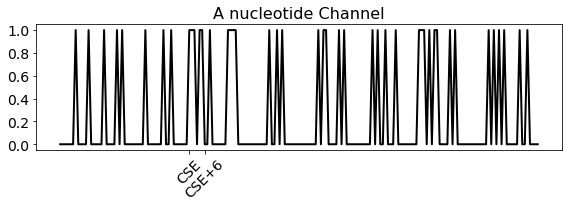

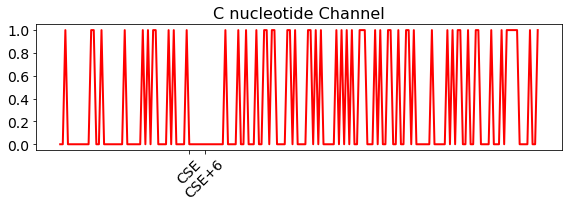

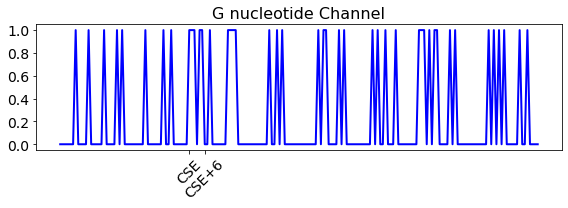

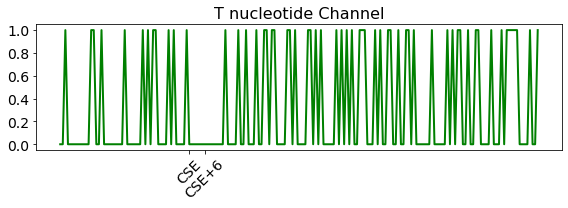

In [65]:
chr_hold= "chr13"
start_hold = 10168271
start_hold=112878298
end_hold = 112880690
#end_hold = 10171137 
#import BSgenome
bs_genome = importr('BSgenome.Hsapiens.UCSC.hg38')
# You need to import 'Biostrings' explicitly
# Loading 'BSgenome.Hsapiens.UCSC.hg19' won't load 'Biostrings' automatically
bio_strings = importr('Biostrings')


#one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
#seqseq = one_seq[0]
#polyA_loc = seqseq.find("AATAAA")
    
#if(polyA_loc!=-1):
            
#            seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -50), (start_hold + polyA_loc + 135), rinterface.NA_Integer, "+", True)[0]
           
#            res = hot_encode(seqseq_updated)
    
one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
    #one_seq = one_seq[::-1]
seqseq = one_seq[0]
polyA_loc = seqseq.find("AATAAA")      

if(polyA_loc==-1):
            polyA_loc = seqseq.find("ATTAAA")
            print("No signals were detected for the range")
if(polyA_loc!=-1):
            seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -130), (start_hold + polyA_loc + 55), rinterface.NA_Integer, "+", True)[0]
            seqseq_updated = seqseq_updated[::-1]
            res = hot_encode(seqseq_updated)
            
            print(seqseq_updated)            
            checkLs= [res]
            checkLs = np.asarray(checkLs)
            checkLs.shape
            print("Random polyA signals are given a value of 0 and IPA sites are given a value of 1")
            if((model.predict_classes(checkLs) ==1).astype("int32")==1):
                print("Predicted to be an actual IPA event")
                print(model.predict_classes(checkLs))
            else:
                print("This range is not predicted to be an IPA event")

res1 = [item[0] for item in res]
res2 = [item[1] for item in res]
res3 = [item[2] for item in res]
res4 = [item[3] for item in res]
f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(186), np.ravel(res1), linewidth=2, color='black')
plt.title("A nucleotide Channel", fontsize=16)
plt.xticks([50, 56], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(186), np.ravel(res2), linewidth=2, color='red')
plt.title("C nucleotide Channel", fontsize=16)
plt.xticks([50, 56], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(186), np.ravel(res1), linewidth=2, color='blue')
plt.title("G nucleotide Channel", fontsize=16)
plt.xticks([50, 56], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(186), np.ravel(res2), linewidth=2, color='green')
plt.title("T nucleotide Channel", fontsize=16)
plt.xticks([50, 56], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [68]:
model.save('/Users/annicenajafi/Downloads/CIS_IPA.h5', save_format='h5')

In [73]:
from math import expm1
import joblib
import pandas as pd
from flask import Flask, jsonify, request
from tensorflow import keras
app = Flask(__name__)
model = keras.models.load_model("/Users/annicenajafi/Downloads/CIS_IPA.h5")

@app.route("/", methods=["POST"])
def index():
    data = request.json
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(transformer.transform(df))
    #predicted_price = expm1(prediction.flatten()[0])
    return jsonify({"price": str(10)})

In [78]:
!flask run

zsh:1: command not found: flask


In [62]:
import flask
app = flask.Flask('IPA_CIS')

def model_predict(seq_range, model):
    
    chr_hold = str.split(seq_range, ',')[0]
    start_hold=str.split(seq_range, ',')[1]
    end_hold=str.split(seq_range, ',')[2]
    bs_genome = importr('BSgenome.Hsapiens.UCSC.hg38')
    # You need to import 'Biostrings' explicitly
    # Loading 'BSgenome.Hsapiens.UCSC.hg19' won't load 'Biostrings' automatically
    bio_strings = importr('Biostrings')
    
    one_seq = bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, start_hold, end_hold, rinterface.NA_Integer, "+", True)
    #one_seq = one_seq[::-1]
    seqseq = one_seq[0]
    polyA_loc = seqseq.find("AATAAA")      

    if(polyA_loc==-1):
            polyA_loc = seqseq.find("ATTAAA")
            result = "No signals were detected for the range"
    if(polyA_loc!=-1):
            seqseq_updated= bio_strings.getSeq(bs_genome.Hsapiens, chr_hold, (start_hold + polyA_loc -130), (start_hold + polyA_loc + 55), rinterface.NA_Integer, "+", True)[0]
            seqseq_updated = seqseq_updated[::-1]
            res = hot_encode(seqseq_updated)
            
            print(seqseq_updated)            
            checkLs= [res]
            checkLs = np.asarray(checkLs)
            checkLs.shape
            print("Random polyA signals are given a value of 0 and IPA sites are given a value of 1")
            if((model.predict(checkLs) > 0.5).astype("int32")==1):
                result = "Predicted to be an actual IPA event"
            else:
                result = "This range is not predicted to be an IPA event"
    return result
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                

@app.route('/', methods=['Get'])
def index():
    return render_template('index.html')
@app.route('/', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        f = request.files['file']
        
        basepath=os.path.dirname(__file__)
        file_path=os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)
        preds= model.predict(seq_range, model)


In [91]:
# Load libraries
import flask
import pandas as pd
import tensorflow as tf
import keras
from keras.models import load_model

# instantiate flask 
app = flask.Flask(__name__)

# we need to redefine our metric function in order 
# to use it when loading the model 
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc

# load the model, and pass in the custom metric function
global graph
#graph = tf.get_default_graph()
model = load_model('/Users/annicenajafi/Downloads/CIS_IPA.h5', custom_objects={'auc': auc})

# define a predict function as an endpoint 
@app.route("/predict", methods=["GET","POST"])
def predict():
    data = {"success": False}

    params = flask.request.json
    if (params == None):
        params = flask.request.args

    # if parameters are found, return a prediction
    if (params != None):
        x=pd.DataFrame.from_dict(params, orient='index').transpose()
        #with graph.as_default():
        data["prediction"] = str(model.predict(x)[0][0])
        data["success"] = True

    # return a response in json format 
    return flask.jsonify(data)    

# start the flask app, allow remote connections 
app.run(host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [30/Apr/2021 13:33:09] "GET / HTTP/1.1" 404 -


In [92]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [100]:
# imports
#import tensorflow.contrib.keras as keras
import keras
from keras import model_from_json 

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


ImportError: cannot import name 'model_from_json' from 'keras' (/Users/annicenajafi/Library/Python/3.7/lib/python/site-packages/keras/__init__.py)

In [98]:
!pip3 install tensorflow==1.15

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 124.0 MB 13.1 MB/s eta 0:00:01    |████████                        | 30.6 MB 4.4 MB/s eta 0:00:22     |████████████████▎               | 62.9 MB 8.5 MB/s eta 0:00:08     |███████████████████████████▋    | 106.9 MB 6.3 MB/s eta 0:00:03� | 117.1 MB 5.5 MB/s eta 0:00:02
     |████████████████████████████████| 3.8 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 5.7 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=1f09c9500b62b35847e4fa6329723fc71a10dab46e7022dc68f5640b648828ad
  Stored in directory: /Users/annicenajafi/Library/Caches/pip/wheels/21/7f/02/4

In [ ]:
from flask import Flask, render_template, request

@app.route('/')
def index_view():
    return render_template('index.html')


@app.route('/predict/',methods=['GET','POST'])
def predict():
	response = "For ML Prediction"
return response	

if __name__ == '__main__':
    app.run(debug=True, port=8000)


<h2><p style="color:#FF1493">Using Autokeras ... </h2>

In [90]:
model.save('/Users/annicenajafi/Downloads/CIS_IPA.h5', save_format='h5')

In [ ]:
import os

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_files

import autokeras as ak

train_set = tf.data.Dataset.from_tensor_slices(((seq_store,), (y_train,))).batch(32)
test_set = tf.data.Dataset.from_tensor_slices(((x_val,), (y_val,))).batch(32)

clf = ak.TextClassifier(overwrite=True, max_trials=2)
# Feed the tensorflow Dataset to the classifier.
clf.fit(train_set, epochs=2)
# Predict with the best model.
predicted_y = clf.predict(test_set)
# Evaluate the best model with testing data.
print(clf.evaluate(test_set))